In [1]:
%load_ext autoreload 
%autoreload 2

In [82]:
import torch 
import matplotlib.pyplot as plt 
import einops 

import rotary_embedding
import gpt 

device = 'mps' if torch.has_mps else 'cpu'

In [97]:
model = gpt.gpt_model(1024).to('mps')

In [101]:
model(torch.randint(0, 1024, size=(4, 128)).to('mps')).shape

torch.Size([4, 128, 1024])

In [111]:
r_e = rotary_embedding.rotary_embedding(dim=32, learned_freq=True)

In [115]:
r_e

rotary_embedding()

In [60]:
q = torch.randn(1, 8, 1024, 64) 
k = torch.randn(1, 8, 1024, 64)

In [61]:
q.shape # batch_size, head, seq_len, head_dim 

torch.Size([1, 8, 1024, 64])

In [79]:
q.mean()

tensor(-0.0001)

In [81]:
r_e.rotate_queries_or_keys(q).mean()

tensor(0.0007)

In [49]:
r_e.freqs.shape

torch.Size([512])

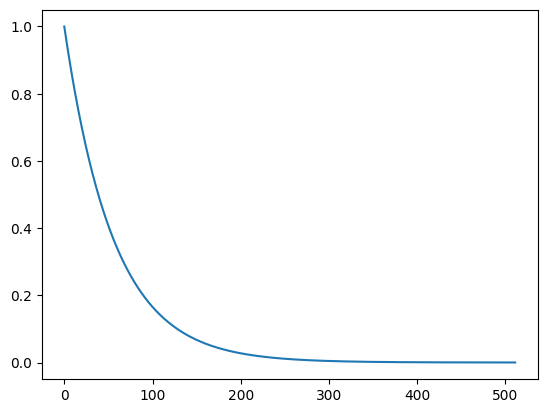

In [31]:
plt.plot(r_e.freqs.tolist())

In [32]:
def precompute(dim, end, theta=10000.0): 
  freqs = 1.0 / (theta ** (torch.arange(0, dim, 2)[: (dim // 2)].float() / dim))
  t = torch.arange(end, device=freqs.device)  # type: ignore
  freqs = torch.outer(t, freqs).float()  # type: ignore
  freqs_cos = torch.cos(freqs)  # real part
  freqs_sin = torch.sin(freqs)  # imaginary part
  return freqs_cos, freqs_sin